In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import csv
import os
#from os.path import dirname, join as pjoin
import re, sys
import matplotlib.pyplot as plt
import nibabel as nib
from nibabel.testing import data_path
import h5py

In [2]:
path= '/data/neuromark2/Data/ABCD/Data_BIDS/Raw_Data/'

In [3]:
list1=os.listdir(path)
len(list1)

11764

In [4]:
bsid=[]
gray_BList=[]
for subjectIds in list1:
    newpath = path + subjectIds + '/Baseline/'
    fileFlag = False
    if os.path.isdir(newpath):
        for inside_file in os.listdir(newpath):
            if inside_file.startswith("anat_201") and fileFlag == False:
                newpath = newpath + inside_file + '/Sm6mwc1pT1.nii'
                fileFlag= True
                gray_BList.append(newpath)
                bsid.append(subjectIds)

In [6]:
pd.DataFrame(bsid).to_csv("SubjectIdsABCD.txt")

In [5]:
gray_Base_List=[]
#gray_Two_List=[]
#subtract=[]
for sid in bsid:
    subject_name=str(sid)
    sub=0
    update_path=path + sid + '/Baseline/'
    #print(sid)
    fileFlag = False
    if os.path.isdir(update_path):
        for inside_file in os.listdir(update_path):
            if inside_file.startswith("anat_201") and fileFlag == False:
                update_path = update_path + inside_file + '/Sm6mwc1pT1.nii'
                fileFlag= True
                gray_Base_List.append(update_path)
                #gray_BImage=nib.load(update_path)
                #gray_BData=gray_BImage.get_fdata()

In [6]:
len(gray_Base_List)

11573

In [9]:
gray_B_total_data=np.zeros((121, 145, 121))

In [7]:
gray_B_total_data = np.load("InitialData.npy")

In [8]:
# for i in gray_Base_List:
#     path_dir=i
#     gray_B_img=nib.load(path_dir)
#     gray_T_data=gray_B_img.get_fdata()
#     #print(data)
#     gray_B_total_data +=gray_T_data

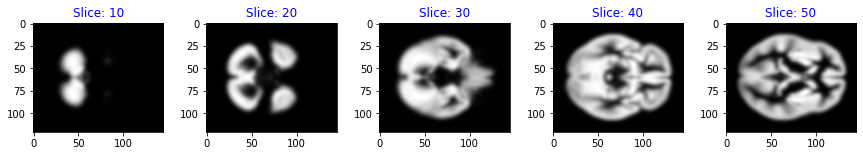

In [9]:
slice_display_number= 5
fig, ax = plt.subplots(1, slice_display_number, figsize=[15, 2])

n =0
slice = 10
for _ in range(slice_display_number) :
    ax[n].imshow(gray_B_total_data[:, :, slice],'gray')
    ax[n].set_title('Slice: {}'.format(slice), color='b')
    n += 1
    slice += 10

In [10]:
gray_B_total_data /=len(gray_Base_List)
print(gray_B_total_data.shape)

(121, 145, 121)


In [11]:
gray_B_mask_data=gray_B_total_data
gray_B_mask_data.shape

(121, 145, 121)

In [12]:
np.max(gray_B_mask_data)

0.7437906778462702

In [13]:
np.count_nonzero(gray_B_mask_data)

1726744

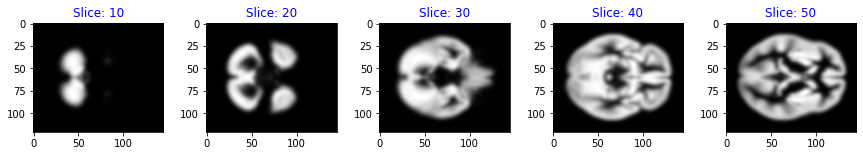

In [14]:
slice_display_number= 5
fig, ax = plt.subplots(1, slice_display_number, figsize=[15, 2])

n =0
slice = 10
for _ in range(slice_display_number) :
    ax[n].imshow(gray_B_mask_data[:, :, slice],'gray')
    ax[n].set_title('Slice: {}'.format(slice), color='b')
    n += 1
    slice += 10

In [15]:
Baseline_mask=gray_B_mask_data>0.2

In [16]:
#count=np.count_nonzero(Baseline_mask==True)
#np.sum(gray_B_mask_data>0.2)
#count

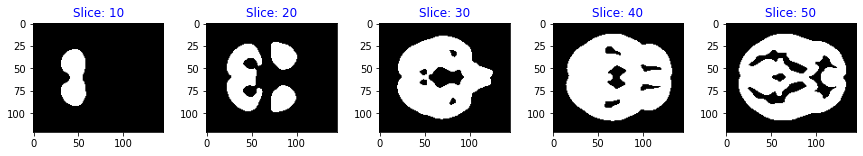

In [17]:
slice_display_number= 5
fig, ax = plt.subplots(1, slice_display_number, figsize=[15, 2])

n =0
slice = 10
for _ in range(slice_display_number) :
    ax[n].imshow(Baseline_mask[:, :, slice],'gray')
    ax[n].set_title('Slice: {}'.format(slice), color='b')
    n += 1
    slice += 10

In [18]:
Baseline_mask.shape

(121, 145, 121)

In [19]:
gray_B_masked_all=[]
ggg=[]
#data_masked_final = []
for i in gray_Base_List:
    path_dir=i
    gb_img=nib.load(path_dir)
    gb_data=gb_img.get_fdata()
    #ggg.append(gb_data)
    gb_data_masked=gb_data * Baseline_mask
    gray_B_masked_all.append(gb_data_masked)

#gray_base_masked_all=np.asarray(gray_B_masked_all)
    #print("Done for " + str(i))

In [20]:
len(gray_B_masked_all)

3000

In [21]:
gray_base_masked_all=np.asarray(gray_B_masked_all)

In [22]:
gray_base_masked_all.shape

(3000, 121, 145, 121)

In [23]:
np.save("ABCDDataOriginalDimension3000.npy",gray_base_masked_all)

In [2]:
abcd_subjects = pd.read_csv("ABCDSexSiteInfo.txt")

In [3]:
abcd_subjects

,Unnamed: 0,src_subject_id,female,abcd_site
0,0,NDARINVVMHC7BEX,no,site16
1,1,NDARINVP65TV30G,yes,site17
2,2,NDARINV6NYCB4Y6,yes,site11
3,3,NDARINVB5PN305C,no,site17
4,4,NDARINVNTJ9TYDB,no,site03
...,...,...,...,...
11568,11568,NDARINVR2EMBDV7,yes,site14
11569,11569,NDARINV95L3764E,yes,site19
11570,11570,NDARINVKNU295WW,no,site18
11571,11571,NDARINV3220ZV0N,no,site02


In [4]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'abcd_site' (categorical site identifier)
label_encoder_site = LabelEncoder()
label_encoded_site = label_encoder_site.fit_transform(abcd_subjects['abcd_site'])

In [5]:
final_dataset={}
#final_dataset['X'] = gray_base_masked_all
final_dataset['y']= abcd_subjects["female"].astype('category').cat.codes
final_dataset['site'] = pd.DataFrame(label_encoded_site).iloc[:,0:].values

In [7]:
final_dataset['y'].shape

(11573,)

In [8]:
import h5py

# Define the file name
hdf5_file_name = "dataset_all_labels_site.h5"

# Save the data to the HDF5 file
with h5py.File(hdf5_file_name, 'w') as hdf5_file:
    for key, value in final_dataset.items():
        if isinstance(value, pd.DataFrame):
            hdf5_file.create_dataset(key, data=value.values)
        else:
            hdf5_file.create_dataset(key, data=value)

print("Data saved to HDF5 file:", hdf5_file_name)

Data saved to HDF5 file: dataset_all_labels_site.h5


In [12]:
hdf5_file_name = "/data/users2/bthapaliya/NeuroimageDistributedFL/SailentWeightsDistributedFL/final_dataset_allsubs.h5"

# Load data from the HDF5 file
abcd_data = {}
with h5py.File(hdf5_file_name, 'r') as hdf5_file:
    for key in hdf5_file.keys():
        abcd_data[key] = hdf5_file[key][()]

In [14]:
abcd_data['X'].shape

(11573, 121, 145, 121)

In [6]:
min_val = np.min(abcd_data)
max_val = np.max(abcd_data)
normalized_data = (abcd_data - min_val) / (max_val - min_val)
eight_bit_data = (normalized_data * 255).astype(np.uint8) / 255.0

In [11]:
np.mean(eight_bit_data)

0.14123473962524957

In [15]:
datamain = abcd_data['X']

In [ ]:
# min_val = np.min(testdatamain)
# max_val = np.max(testdatamain)
# normalized_data = (testdatamain - min_val) / (max_val - min_val)
# eight_bit_data = (normalized_data * 255).astype(np.uint8) / 255.0

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Initialize an empty array to store the scaled data
scaled_data = np.zeros_like(datamain, dtype=np.float32)

# Iterate over each subject and scale their data
for i in range(datamain.shape[0]):
    single_data = datamain[i]
    min_val = np.min(single_data)
    max_val = np.max(single_data)
    normalized_data = (single_data - min_val) / (max_val - min_val)
    eight_bit_data = (normalized_data * 255).astype(np.uint8) / 255.0
    scaled_data[i] = eight_bit_data  # Reshape back to original shape


/tmp/ipykernel_2061347/2224501982.py:11: RuntimeWarning: invalid value encountered in true_divide
  normalized_data = (single_data - min_val) / (max_val - min_val)


In [66]:
np.save("NormalizedDataAll.npy", scaled_data)

In [67]:
eight_bit_data = (scaled_data * 255).astype(np.uint8) / 255.0

: 

: 

In [65]:
np.mean(scaled_data[0])

0.14168783

In [34]:
from sklearn.preprocessing import MinMaxScaler
# Reshape the data to a 2D array, with each voxel as a separate feature
reshaped_data = datamain.reshape(-1, datamain.shape[-1])

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit the scaler to your data (compute mean and standard deviation)
scaler.fit(reshaped_data)

# Transform the data using the scaler to achieve z-score normalization
normalized_data_final = scaler.transform(reshaped_data)

# Reshape the normalized data back to its original shape
normalized_data_final = normalized_data.reshape(datamain.shape)

In [38]:
np.max(normalized_data_final[0])

113

In [ ]:
# Quantize the data to 8 bits
min_value = np.min(normalized_data_final)
max_value = np.max(normalized_data_final)
quantized_data_8_bit = ((normalized_data_final - min_value) / (max_value - min_value) * 255).astype(np.uint8)


In [ ]:
np.save("NormalizedDataForAllSubs.npy", normalized_data)

In [ ]:
allabcddata = np.load("ABCDDataOriginalDimensionALL.npy")

In [4]:
abcd_data['X']

KeyError: 'X'

In [ ]:
gray_B_masked_all=[]
ggg=[]
#data_masked_final = []
for i in gray_Base_List:
    path_dir=i
    gb_img=nib.load(path_dir)
    gb_data=gb_img.get_fdata()
    #ggg.append(gb_data)
    gb_data_masked=gb_data[Baseline_mask]
    #print(gb_data_masked)
    gb_f_data=gb_data_masked.flatten()
   # print(f_data.shape)
    #masked_all=np.empty((11573,490664)
    gray_B_masked_all.append(gb_f_data)
gray_base_masked_all=np.asarray(gray_B_masked_all)
gray_base_masked_all.shape

In [17]:
gray_B_masked_all=[]
ggg=[]
#data_masked_final = []
for i in gray_Base_List:
    path_dir=i
    gb_img=nib.load(path_dir)
    gb_data=gb_img.get_fdata()
    #ggg.append(gb_data)
    gb_data_masked=gb_data[Baseline_mask]
    #print(gb_data_masked)
    gb_f_data=gb_data_masked.flatten()
   # print(f_data.shape)
    #masked_all=np.empty((11573,490664)
    gray_B_masked_all.append(gb_f_data)
gray_base_masked_all=np.asarray(gray_B_masked_all)
gray_base_masked_all.shape

: 

: 

In [ ]:
import pandas as pd
df1=pd.DataFrame(gray_base_masked_all)
df1

In [ ]:
#df1.to_csv('/data/users2/rsapkota/SCCA/Baseline_Only/Gray_Baseline.csv')

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_gray_baseline_result = scaler.fit_transform(df1)

In [53]:
df3=pd.DataFrame(normalized_gray_subtract_result)
df3

,0,1,2,3,4,5,6,7,8,9,...,491450,491451,491452,491453,491454,491455,491456,491457,491458,491459
0,-0.808837,-0.796416,-0.744276,-0.798622,-0.819354,-0.793069,-0.729760,-0.652057,-0.741729,-0.798434,...,-0.900194,-0.994347,-1.029378,-1.016778,-0.724897,-0.861890,-0.972637,-1.028983,-0.684644,-0.816154
1,-0.597439,-0.612565,-0.673902,-0.750195,-0.703538,-0.698082,-0.733460,-0.807634,-0.928063,-0.863581,...,-0.483431,-0.434892,-0.505273,-0.684884,-0.655213,-0.554017,-0.499531,-0.532867,-0.702851,-0.637969
2,0.216585,0.276372,0.331815,0.139470,0.175344,0.234596,0.303121,0.356868,0.135035,0.123598,...,1.077206,1.281571,1.489490,1.656639,0.923415,1.112044,1.301147,1.474350,0.970040,1.168153
3,-0.516252,-0.561525,-0.631826,-0.584620,-0.640576,-0.720096,-0.810616,-0.889201,-0.603504,-0.668772,...,-0.889483,-0.888080,-0.914969,-0.981754,-0.954134,-0.920744,-0.918577,-0.946079,-1.016127,-0.982818
4,-0.105454,-0.098715,-0.070804,-0.150719,-0.161135,-0.158722,-0.137374,-0.088972,-0.176627,-0.196548,...,-0.213316,-0.226564,-0.250535,-0.263505,-0.306818,-0.327349,-0.342135,-0.350066,-0.386536,-0.426005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,-0.549230,-0.483113,-0.450181,-0.674324,-0.615327,-0.536669,-0.479143,-0.461354,-0.751010,-0.735849,...,-0.157896,-0.159938,-0.214324,-0.288104,-0.157149,-0.120938,-0.132504,-0.191629,-0.143400,-0.118791
2883,0.160632,0.060430,0.001810,0.257645,0.178161,0.071410,-0.020788,-0.041555,0.197055,0.202957,...,-0.456711,-0.335754,-0.217668,-0.124745,-0.879965,-0.708838,-0.506084,-0.299804,-1.169515,-0.973585
2884,1.494272,1.431116,1.466168,1.414603,1.430987,1.442946,1.536310,1.735081,1.188005,1.279126,...,2.369105,2.228625,2.030207,1.799748,2.446312,2.465277,2.395904,2.243967,2.439933,2.539458
2885,-1.252530,-1.371671,-1.409140,-1.084582,-1.251435,-1.370740,-1.403347,-1.326718,-0.922927,-1.096686,...,-0.599712,-0.617028,-0.569967,-0.485598,-0.556807,-0.637802,-0.668852,-0.643194,-0.569220,-0.651403


In [54]:
df3.insert (0, "ID", lc)

In [55]:
df3

,ID,0,1,2,3,4,5,6,7,8,...,491450,491451,491452,491453,491454,491455,491456,491457,491458,491459
0,NDARINVHEABF6E2,-0.808837,-0.796416,-0.744276,-0.798622,-0.819354,-0.793069,-0.729760,-0.652057,-0.741729,...,-0.900194,-0.994347,-1.029378,-1.016778,-0.724897,-0.861890,-0.972637,-1.028983,-0.684644,-0.816154
1,NDARINVDE3J6HBM,-0.597439,-0.612565,-0.673902,-0.750195,-0.703538,-0.698082,-0.733460,-0.807634,-0.928063,...,-0.483431,-0.434892,-0.505273,-0.684884,-0.655213,-0.554017,-0.499531,-0.532867,-0.702851,-0.637969
2,NDARINV29TAPT8B,0.216585,0.276372,0.331815,0.139470,0.175344,0.234596,0.303121,0.356868,0.135035,...,1.077206,1.281571,1.489490,1.656639,0.923415,1.112044,1.301147,1.474350,0.970040,1.168153
3,NDARINVDTAY6VX0,-0.516252,-0.561525,-0.631826,-0.584620,-0.640576,-0.720096,-0.810616,-0.889201,-0.603504,...,-0.889483,-0.888080,-0.914969,-0.981754,-0.954134,-0.920744,-0.918577,-0.946079,-1.016127,-0.982818
4,NDARINV07CMT243,-0.105454,-0.098715,-0.070804,-0.150719,-0.161135,-0.158722,-0.137374,-0.088972,-0.176627,...,-0.213316,-0.226564,-0.250535,-0.263505,-0.306818,-0.327349,-0.342135,-0.350066,-0.386536,-0.426005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,NDARINVXUKUXGAW,-0.549230,-0.483113,-0.450181,-0.674324,-0.615327,-0.536669,-0.479143,-0.461354,-0.751010,...,-0.157896,-0.159938,-0.214324,-0.288104,-0.157149,-0.120938,-0.132504,-0.191629,-0.143400,-0.118791
2883,NDARINV1JAFHY62,0.160632,0.060430,0.001810,0.257645,0.178161,0.071410,-0.020788,-0.041555,0.197055,...,-0.456711,-0.335754,-0.217668,-0.124745,-0.879965,-0.708838,-0.506084,-0.299804,-1.169515,-0.973585
2884,NDARINVJHCBZTEX,1.494272,1.431116,1.466168,1.414603,1.430987,1.442946,1.536310,1.735081,1.188005,...,2.369105,2.228625,2.030207,1.799748,2.446312,2.465277,2.395904,2.243967,2.439933,2.539458
2885,NDARINVWEJMEVJN,-1.252530,-1.371671,-1.409140,-1.084582,-1.251435,-1.370740,-1.403347,-1.326718,-0.922927,...,-0.599712,-0.617028,-0.569967,-0.485598,-0.556807,-0.637802,-0.668852,-0.643194,-0.569220,-0.651403


In [56]:
import pickle

In [57]:
df3.to_pickle("/data/users2/rsapkota/SCCA/Gray_Matter/GM_subtract_id.pkl")